In [1]:
import numpy as np
import pandas as pd
from src.constants import Constants, params
from src.styling import *
from src.utils import *
from src.plots import *
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format','{:,.2f}'.format)

In [3]:
df = pd.read_csv(params.get(Constants.URL_LINK_TO_DATA), delimiter = ",")
df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.00,0.00,0,0.00,0.00,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.05,-3.07,1,21.47,155.97,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.40,-0.91,0,0.00,0.00,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.17,-1.77,0,0.00,0.00,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.00,0.00,0,0.00,0.00,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


# 1. Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   duree     163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nbrtotc   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB


In [5]:
summary = df.describe()
summary.style.applymap(highlight_col, subset=pd.IndexSlice[['mean', 'max'], [params.get(Constants.NB_CLAIMS)]])
summary

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot
count,"163,657.00","163,657.00","163,657.00","163,657.00","163,657.00","163,657.00","163,657.00"
mean,47.00,"5,270.91",0.89,-0.21,0.12,0.16,201.10
std,14.83,"2,687.63",0.24,0.59,0.37,0.98,"5,885.39"
min,17.00,"1,000.00",0.00,-5.90,0.00,0.00,0.00
25%,35.00,"2,900.00",1.00,0.00,0.00,0.00,0.00
50%,46.00,"5,030.00",1.00,0.00,0.00,0.00,0.00
75%,58.00,"7,500.00",1.00,0.00,0.00,0.00,0.00
max,95.00,"9,990.00",1.01,0.01,5.00,182.50,"1,989,567.90"


In [6]:
# CODPOSS should be a categorical variable as it stands for the postal code in Belgium
df['CODPOSS'] = df.CODPOSS.astype('str')

In [7]:
# we want to cap the maximum number of years a policyholder has with an insurer 
max_nb_anciennete = params.get(Constants.MAX_NB_ANCIENNETE)
df['nbrtotan'] = np.select([df.nbrtotan > max_nb_anciennete, df.nbrtotan <= max_nb_anciennete], [max_nb_anciennete, df.nbrtotan ])

In [8]:
df.nbrtotan[df.nbrtotan==max_nb_anciennete]

15011   82.00
28398   82.00
46731   82.00
90348   82.00
Name: nbrtotan, dtype: float64

In [9]:
# we want to cap the maximum claim amount
max_claim_amount = params.get(Constants.MAX_CLAIM_AMOUNT)
df['chargtot'] = np.select([df.chargtot > max_claim_amount, df.chargtot <= max_claim_amount], [max_claim_amount, df.chargtot])

In [10]:
df.chargtot[df.chargtot==max_claim_amount]

11748   500,000.00
Name: chargtot, dtype: float64

In [11]:
# check how many categories for categorical variables
info_categories = get_distribution_info_for_categorical_variables(df)
info_categories

,nb_unique_categories,distribution
CODPOSS,583,"{'6000': '3.08%', '2000': '2.86%', '9000': '2.14%', '4000': '1.61%', '7100': '1.39%', '7000': '1.25%', '7500': '0.97%', '5000': '0.94%', '3000': '0.89%', '8000': '0.88%', '4100': '0.85%', '2800': '0.82%', '8400': '0.77%', '1000': '0.72%', '8500': '0.72%', '6200': '0.71%', '9300': '0.71%', '7060': '0.70%', '6180': '0.69%', '4040': '0.65%', '7800': '0.65%', '9100': '0.64%', '1070': '0.64%', '7330': '0.63%', '7130': '0.63%', '1030': '0.57%', '9600': '0.57%', '1800': '0.56%', '1480': '0.56%', '8800': '0.55%', '8930': '0.55%', '4800': '0.53%', '7700': '0.52%', '1180': '0.51%', '7370': '0.51%', '5300': '0.50%', '8940': '0.50%', '7300': '0.48%', '7860': '0.47%', '1420': '0.46%', '1080': '0.45%', '2830': '0.44%', '5060': '0.44%', '6790': '0.43%', '6220': '0.43%', '3600': '0.43%', '2880': '0.42%', '7340': '0.41%', '3630': '0.41%', '8790': '0.41%', '3700': '0.40%', '4400': '0.40%', '1050': '0.39%', '4630': '0.39%', '4680': '0.39%', '4430': '0.38%', '3300': '0.38%', '3500': '0.38%', '7080': '..."
agecar,4,"{'6-10': '41.03%', '2-5': '31.50%', '>10': '22.72%', '0-1': '4.75%'}"
sexp,2,"{'Male': '73.59%', 'Female': '26.41%'}"
fuelc,2,"{'Petrol': '69.18%', 'Gasoil': '30.82%'}"
split,4,"{'Once': '49.79%', 'Twice': '28.08%', 'Monthly': '14.42%', 'Thrice': '7.71%'}"
usec,2,"{'Private': '95.11%', 'Professional': '4.89%'}"
fleetc,2,"{'No': '96.80%', 'Yes': '3.20%'}"
sportc,2,"{'No': '99.08%', 'Yes': '0.92%'}"
coverp,3,"{'MTPL': '58.30%', 'MTPL+': '28.15%', 'MTPL+++': '13.55%'}"
powerc,3,"{'<66': '73.21%', '66-110': '25.78%', '>110': '1.01%'}"


In [12]:
# lower number of categories 

## 1.1 univariate analysis of numerical data

In [13]:
numerical_variables = list(df.select_dtypes(exclude=['object']).columns)
numerical_variables

['AGEPH', 'duree', 'lnexpo', 'nbrtotc', 'nbrtotan', 'chargtot']

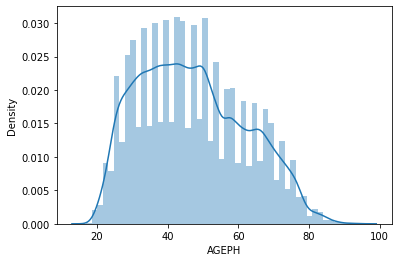

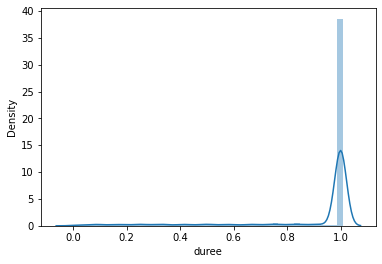

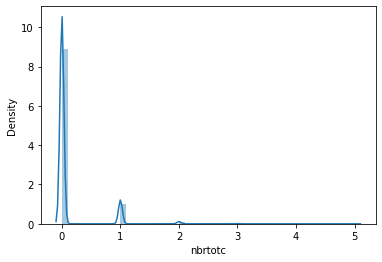

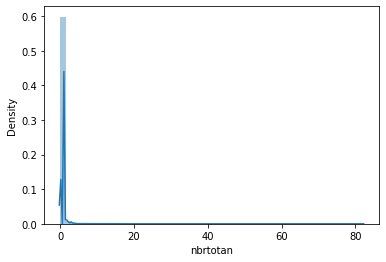

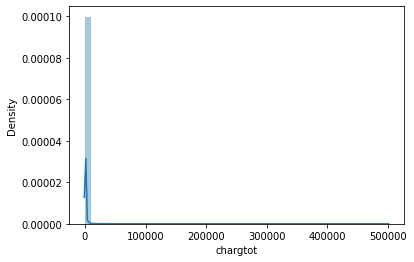

In [14]:
plot_univariate_numerical_variables_distribution(df, numerical_variables, params)

## 1.2 univariate analysis of categorical data

In [15]:
categorical_variables = list(df.select_dtypes(include=['object']).columns)
categorical_variables

['CODPOSS',
 'agecar',
 'sexp',
 'fuelc',
 'split',
 'usec',
 'fleetc',
 'sportc',
 'coverp',
 'powerc']

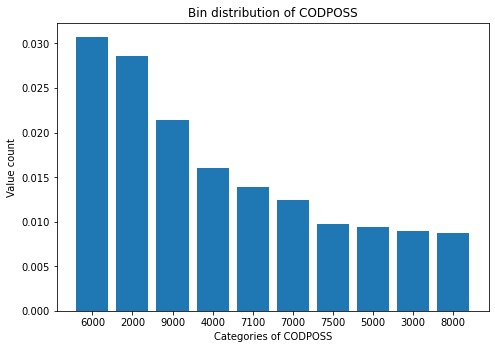

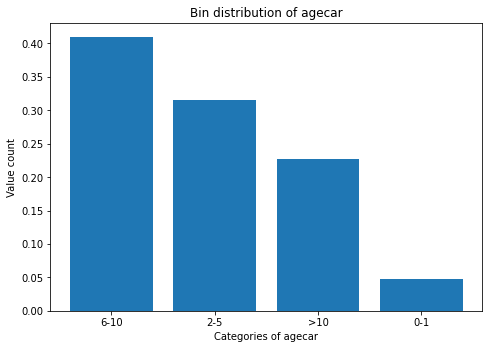

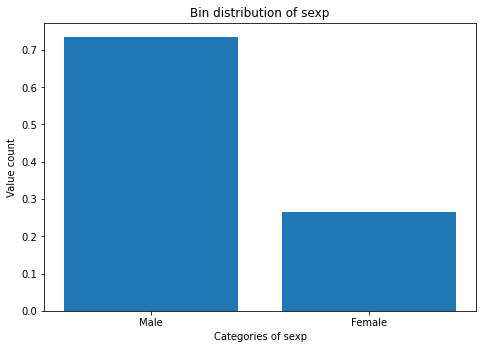

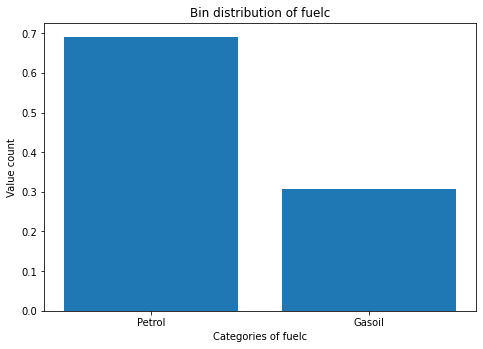

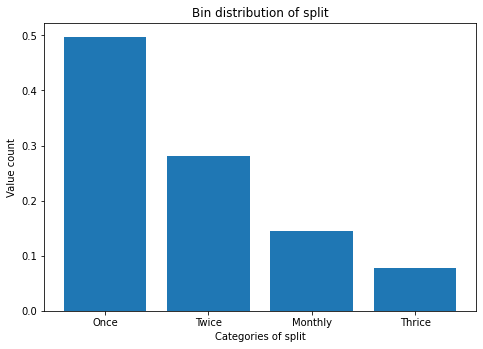

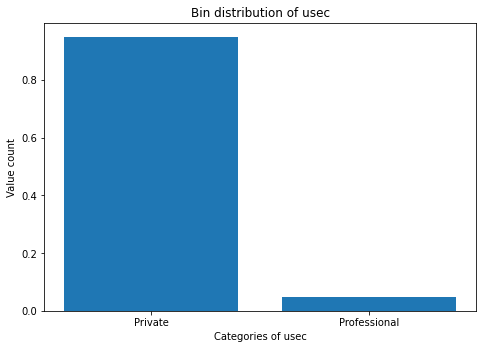

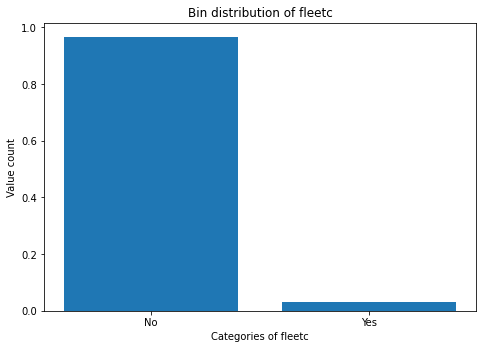

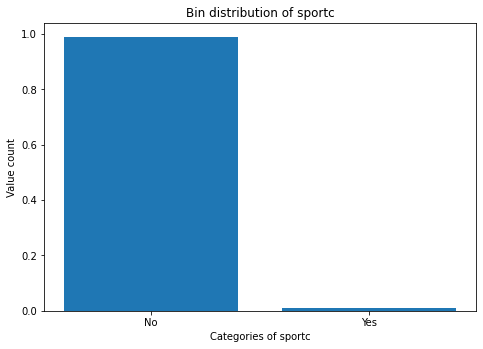

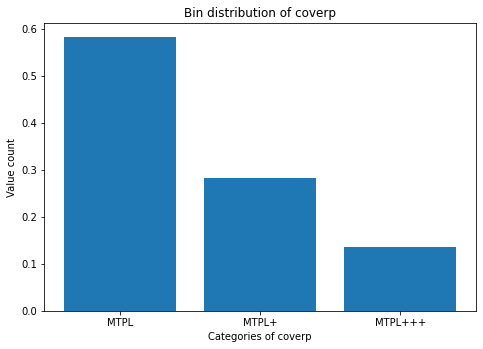

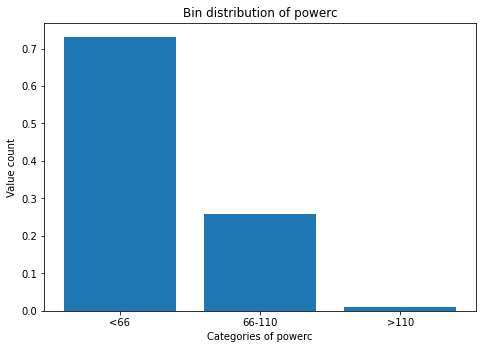

In [16]:
plot_univariate_categorical_variables_distribution(df, categorical_variables, params)

## 1.3 bivariate analysis of numerical data

In [17]:
nb_claims_name, claim_amount_name = params.get(Constants.NB_CLAIMS), params.get(Constants.CLAIM_AMOUNT)
claim_frequency_name = params.get(Constants.CLAIM_FREQUENCY)

In [18]:
exposure_name = params.get(Constants.EXPOSURE_NAME)

In [19]:
df[claim_frequency_name] = df[nb_claims_name]/df[exposure_name]

In [20]:
df[[claim_frequency_name, exposure_name, nb_claims_name]].describe()

,claim_frequency,duree,nbrtotc
count,"163,657.00","163,657.00","163,657.00"
mean,0.16,0.89,0.12
std,0.98,0.24,0.37
min,0.00,0.00,0.00
25%,0.00,1.00,0.00
50%,0.00,1.00,0.00
75%,0.00,1.00,0.00
max,182.50,1.01,5.00


In [21]:
df.groupby(nb_claims_name)[nb_claims_name, exposure_name, claim_frequency_name].agg(nb_claims=(nb_claims_name, 'count'),\
                                                                                    exposure=(exposure_name, 'sum'),\
                                                                                    frequency=(claim_frequency_name, 'mean'))

,nb_claims,exposure,frequency
nbrtotc,,,
0,145312,"128,595.95",0.00
1,16602,"15,410.32",1.29
2,1562,"1,447.30",2.35
3,162,150.45,3.40
4,17,14.33,5.12
5,2,1.38,7.70


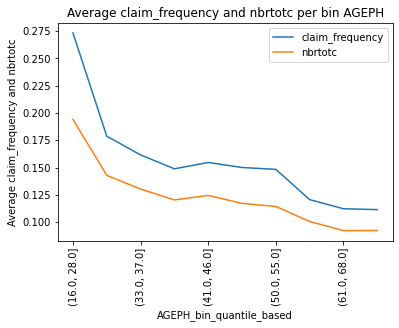

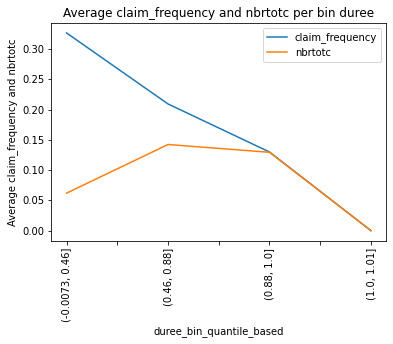

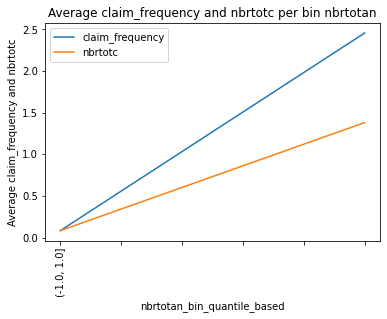

In [22]:
plot_avg_target_per_numerical_bin(df, numerical_variables, params, target=claim_frequency_name)

In [23]:
get_avg_target_per_numerical_bin(df, 'AGEPH', [nb_claims_name, claim_amount_name])

,nbrtotc,chargtot
AGEPH_bin_quantile_based,,
"(16.0, 28.0]",0.19,364.28
"(28.0, 33.0]",0.14,242.43
"(33.0, 37.0]",0.13,159.98
"(37.0, 41.0]",0.12,200.21
"(41.0, 46.0]",0.12,222.06
"(46.0, 50.0]",0.12,182.90
"(50.0, 55.0]",0.11,148.41
"(55.0, 61.0]",0.10,120.31
"(61.0, 68.0]",0.09,112.86


In [24]:
get_avg_target_per_numerical_bin(df, 'nbrtotan', [nb_claims_name, claim_amount_name])

,nbrtotc,chargtot
nbrtotan_bin_quantile_based,,
"(-1.0, 1.0]",0.08,119.01
"(1.0, 82.0]",1.38,"2,457.55"


## 1.4 bivariate analysis of categorical data

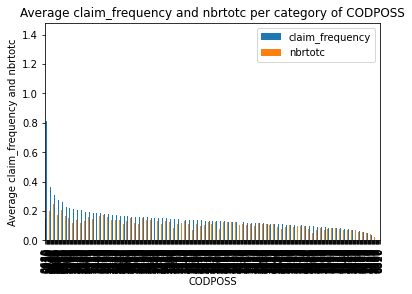

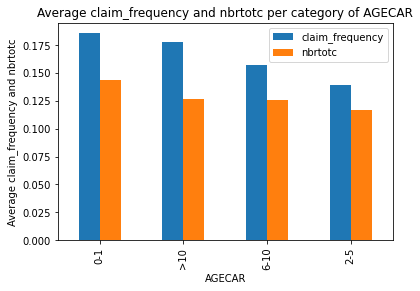

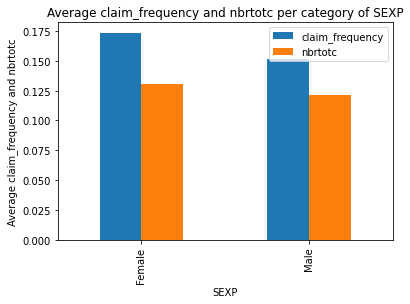

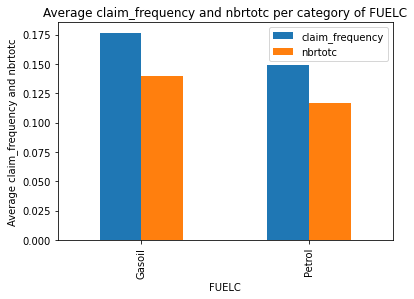

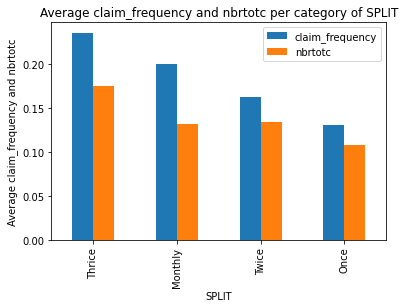

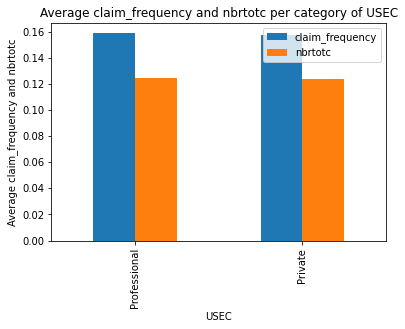

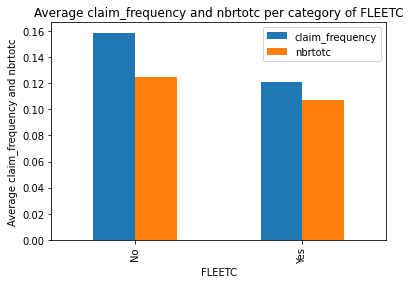

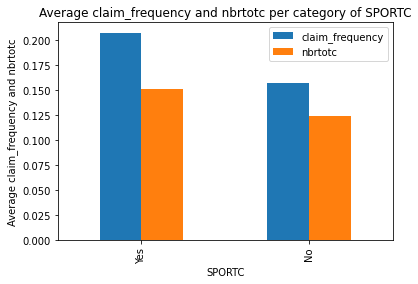

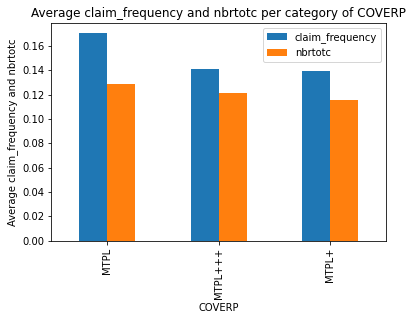

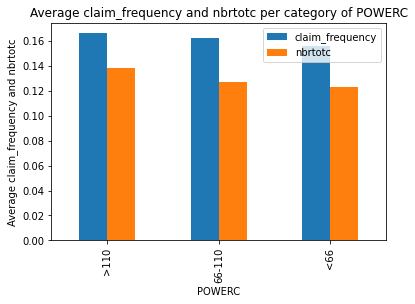

In [25]:
plt_avg_target_per_category(df, categorical_variables, params, target=claim_frequency_name)

In [26]:
for cat_var in categorical_variables:
    print(df.groupby(cat_var)[[claim_frequency_name,nb_claims_name, claim_amount_name]].mean().sort_values(by=[nb_claims_name, claim_amount_name], ascending=False))
    print('-'*100)

         claim_frequency  nbrtotc  chargtot
CODPOSS                                    
6637                0.33     0.30     46.71
1210                0.45     0.29    285.30
1040                0.34     0.25    453.85
3040                0.37     0.25    333.48
3790                0.32     0.25    240.45
...                  ...      ...       ...
6887                0.00     0.00      0.00
6890                0.00     0.00      0.00
6970                0.00     0.00      0.00
8920                0.00     0.00      0.00
8957                0.00     0.00      0.00

[583 rows x 3 columns]
----------------------------------------------------------------------------------------------------
        claim_frequency  nbrtotc  chargtot
agecar                                    
0-1                0.19     0.14    254.40
>10                0.18     0.13    201.37
6-10               0.16     0.13    197.88
2-5                0.14     0.12    168.18
---------------------------------------------

In [58]:
# processing postcode data
postcode_mapping = pd.read_csv(params.get(Constants.LINK_TO_POSTAL_CODE_MAPPING), delimiter=';')
postcode_mapping.head(3)

,Code,Localite,Longitude,Latitude,Coordonnees,Geom
0,1050,Ixelles,4.38,50.82,"50.8222854,4.3815707",NaN
1,1081,Koekelberg,4.33,50.86,"50.8622633,4.3257084",NaN
2,1130,Haren,4.41,50.89,"50.8919661,4.41257087324",NaN


In [ ]:
postcode_mapping['Code'] = postcode_mapping['Code'].astype('str')

In [ ]:
postcode_mapping_dic = {}
for code, district in zip(postcode_mapping.Code, postcode_mapping.Localite):
    if code not in postcode_mapping:
        postcode_mapping_dic[code]= district

In [59]:
df['district'] = df.CODPOSS.replace(postcode_mapping_dic)

In [ ]:
avg_claim_per_district = df.groupby('district')[[claim_frequency_name,nb_claims_name, claim_amount_name]].mean().sort_values(by=[claim_frequency_name, claim_amount_name], ascending=False)

Text(0, 0.5, 'claim frequency')

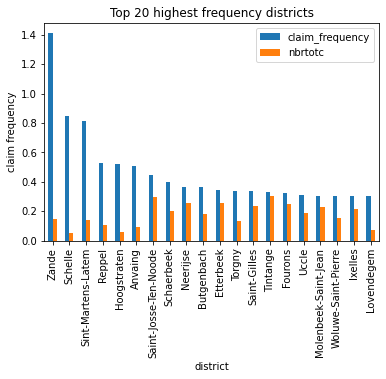

In [62]:
avg_claim_per_district.head(20)[[claim_frequency_name, nb_claims_name]].plot.bar()
plt.title('Top 20 highest frequency districts')
plt.ylabel('claim frequency')

Text(0, 0.5, 'claim frequency')

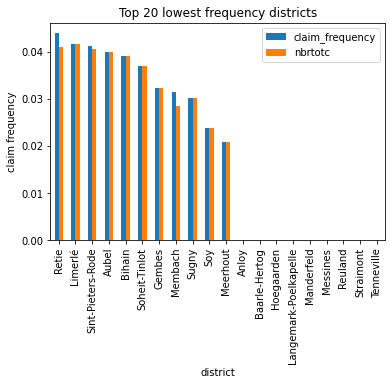

In [63]:
avg_claim_per_district.tail(20)[[claim_frequency_name, nb_claims_name]].plot.bar()
plt.title('Top 20 lowest frequency districts')
plt.ylabel('claim frequency')

# 2. Feature Engineering

In [27]:
for cat_var in categorical_variables:
    df[cat_var] = pd.Categorical(df[cat_var])
for num_var in numerical_variables:
    df[num_var] = pd.to_numeric(df[num_var])

In [28]:
df.dtypes

AGEPH                 int64
CODPOSS            category
duree               float64
lnexpo              float64
nbrtotc               int64
nbrtotan            float64
chargtot            float64
agecar             category
sexp               category
fuelc              category
split              category
usec               category
fleetc             category
sportc             category
coverp             category
powerc             category
claim_frequency     float64
dtype: object

,Code,Localite,Longitude,Latitude,Coordonnees,Geom
0,1050,Ixelles,4.38,50.82,"50.8222854,4.3815707",NaN
1,1081,Koekelberg,4.33,50.86,"50.8622633,4.3257084",NaN
2,1130,Haren,4.41,50.89,"50.8919661,4.41257087324",NaN


## 2.1 Processing with Binning continuous variables

In [ ]:
test_size, random_state = params.get(Constants.TEST_SIZE), params.get(Constants.RANDOM_STATE)

In [ ]:
df_cp = df.copy()

In [ ]:
df.columns

In [ ]:
nb_claims, claim_amount, claim_frequency = df[nb_claims_name], df[claim_amount_name], df[claim_frequency_name]
exposure = df[exposure_name]

In [ ]:
non_predictor_variables = [claim_amount_name, claim_frequency_name, nb_claims_name, *params.get(Constants.VARIABLES_TO_EXCLUDE)]

In [ ]:
X =df.drop(columns=non_predictor_variables)

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,nb_claims,test_size=test_size, random_state=random_state, stratify=nb_claims)

### 2.1.1 Dummy Coding with reference class

# 3. Modelling

## 3.1

## 3.2 Lasso

In [ ]:
# 3. Modelling frequency

# 4. Conclusion